# Survey Dataset 


I will analyse some data regarding the emerging technologies


First I will plot some charts showing how the respondents are connected to different variables such as age, country and education level

Then I will:
    
*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df= pd.read_csv('tech.csv')
df.head()

,Unnamed: 0,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,multiplier,NormalizedAnnualCompensation
0,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,1,138000.0
1,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy,12,114000.0
2,6,20,"I am not primarily a developer, but I write co...",No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Lithuania,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,38.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,12,36000.0
3,7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,1,103000.0
4,8,23,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,22.0,Man,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy,1,69000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6333 entries, 0 to 6332
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6333 non-null   int64  
 1   Respondent                    6333 non-null   int64  
 2   MainBranch                    6333 non-null   object 
 3   Hobbyist                      6333 non-null   object 
 4   OpenSourcer                   6333 non-null   object 
 5   OpenSource                    6333 non-null   object 
 6   Employment                    6333 non-null   object 
 7   Country                       6333 non-null   object 
 8   Student                       6333 non-null   object 
 9   EdLevel                       6333 non-null   object 
 10  UndergradMajor                6333 non-null   object 
 11  EduOther                      6333 non-null   object 
 12  OrgSize                       6333 non-null   object 
 13  Dev

I will perform some analyses and plotting interesting charts to show some interesting insights:

In [5]:
df['Age'].value_counts().head(10)

25.0    446
28.0    441
27.0    428
26.0    419
29.0    405
30.0    391
24.0    380
31.0    330
23.0    316
32.0    281
Name: Age, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '25.0'),
  Text(1, 0, '28.0'),
  Text(2, 0, '27.0'),
  Text(3, 0, '26.0'),
  Text(4, 0, '29.0'),
  Text(5, 0, '30.0'),
  Text(6, 0, '24.0'),
  Text(7, 0, '31.0'),
  Text(8, 0, '23.0'),
  Text(9, 0, '32.0')])

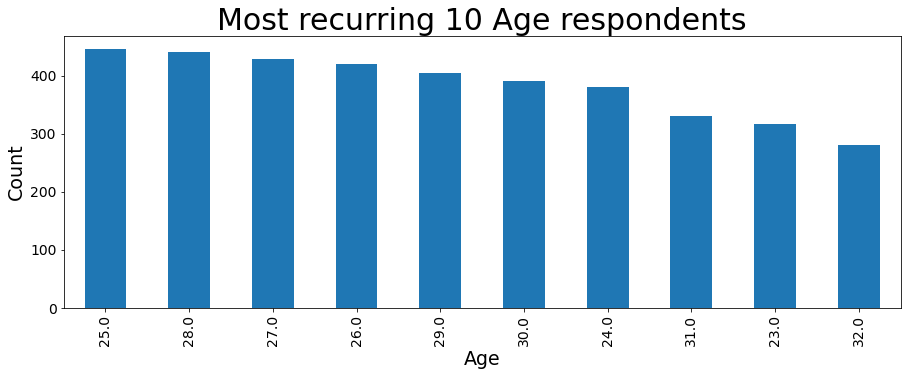

In [6]:
df['Age'].value_counts().head(10).plot(kind='bar', figsize=(15,5))
plt.title('Most recurring 10 Age respondents', fontsize=30)
plt.ylabel('Count', fontsize=19)
plt.xlabel('Age', fontsize=19)
plt.yticks(fontsize=14) # rotation=30
plt.xticks(fontsize=14) # rotation=30

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Netherlands')])

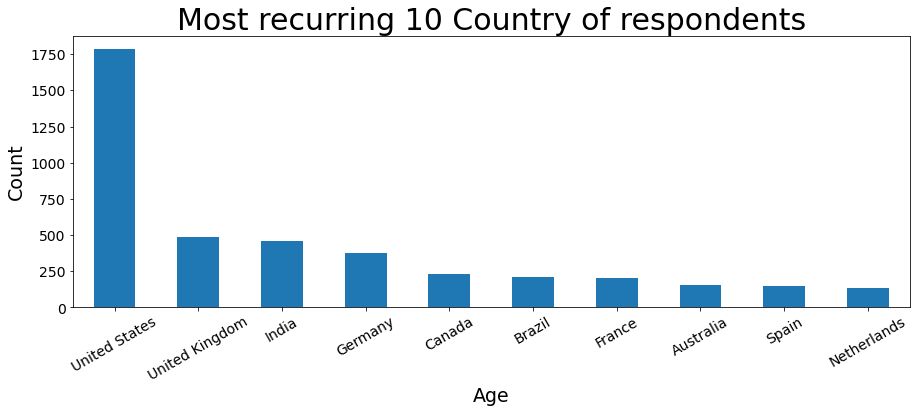

In [8]:
df['Country'].value_counts().head(10).plot(kind='bar', figsize=(15,5))
plt.title('Most recurring 10 Country of respondents', fontsize=30)
plt.ylabel('Count', fontsize=19)
plt.xlabel('Age', fontsize=19)
plt.yticks(fontsize=14) # rotation=30
plt.xticks(fontsize=14, rotation=30)

In [9]:
df['Gender'].value_counts().head(10)

Man                                                        5875
Woman                                                       415
Non-binary, genderqueer, or gender non-conforming            21
Man;Non-binary, genderqueer, or gender non-conforming        13
Woman;Non-binary, genderqueer, or gender non-conforming       7
Woman;Man                                                     2
Name: Gender, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
  Text(1, 0, 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
  Text(2, 0, 'Some college/university study without earning a degree'),
  Text(3, 0, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
  Text(4, 0, 'Associate degree'),
  Text(5, 0, 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
  Text(6, 0, 'Professional degree (JD, MD, etc.)'),
  Text(7, 0, 'I never completed any formal education'),
  Text(8, 0, 'Primary/elementary school')])

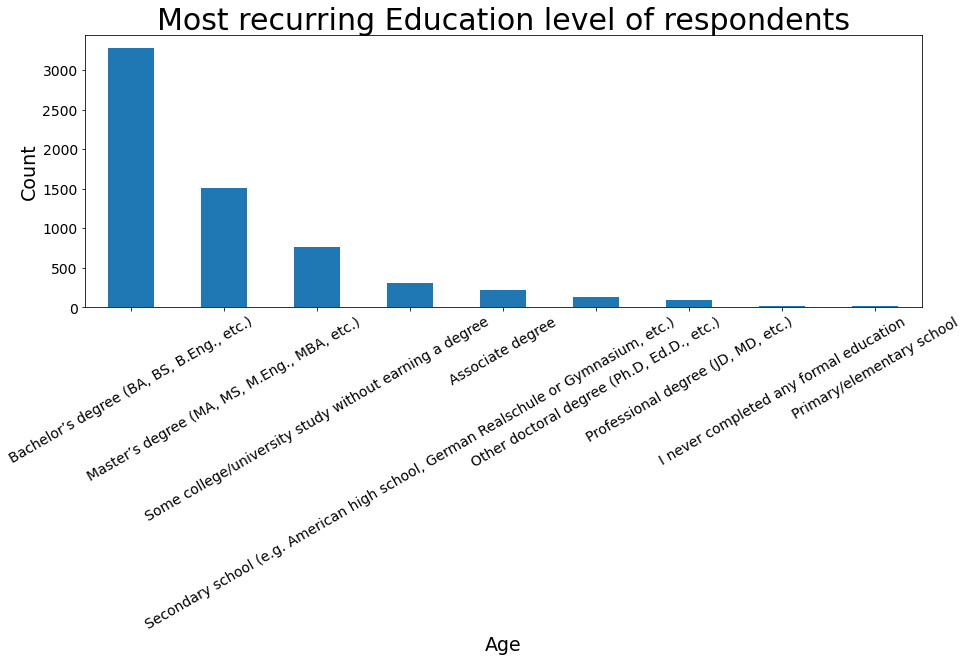

In [13]:
df['EdLevel'].value_counts().head(10).plot(kind='bar', figsize=(15,5))
plt.title('Most recurring Education level of respondents', fontsize=30)
plt.ylabel('Count', fontsize=19)
plt.xlabel('Age', fontsize=19)
plt.yticks(fontsize=14) # rotation=30
plt.xticks(fontsize=14, rotation=30)

In [11]:
df.head(2)

,Unnamed: 0,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,multiplier,NormalizedAnnualCompensation
0,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,1,138000.0
1,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy,12,114000.0


In [12]:
df.columns

Index(['Unnamed: 0', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode',
       'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot',
       'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs'

#### I will identify the distribution of data in the dataset

I will do it for the the column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01. This assumes 12 working months and 50 working weeks.


In [14]:
df['ConvertedComp']

0        95179.0
1        31140.0
2        41244.0
3       103000.0
4        69000.0
          ...   
6328     38760.0
6329      7724.0
6330     35518.0
6331    130000.0
6332     80371.0
Name: ConvertedComp, Length: 6333, dtype: float64

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

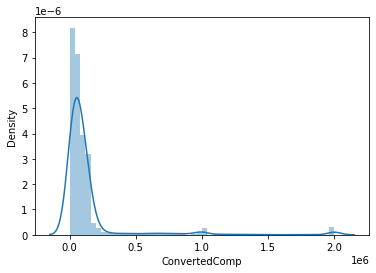

In [18]:
sns.distplot(df['ConvertedComp'])

#### I will identify the outliers in the dataset

I will do it fot the Age variable:

In [19]:
min_=df['Age'].min()
max_=df['Age'].max()
median=df['Age'].quantile(q=0.5)
iq1=df['Age'].quantile(q=0.25)
iq3=df['Age'].quantile(q=0.75)

print(f"The number summary are: \n min: {min_} \n max: {max_} \n median: {median} \n iq1: {iq1} \n iq3: {iq3}")

The number summary are: 
 min: 17.0 
 max: 71.0 
 median: 29.0 
 iq1: 25.0 
 iq3: 34.0


C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

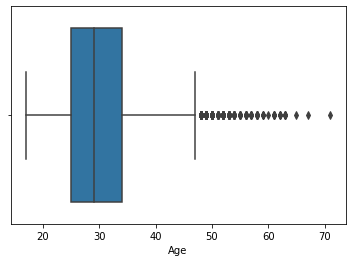

In [20]:
sns.boxplot(df['Age'])

#### I will remove outliers from the dataset

I wil find out if outliers exist in the column ConvertedComp using a box plot

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000., 2250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

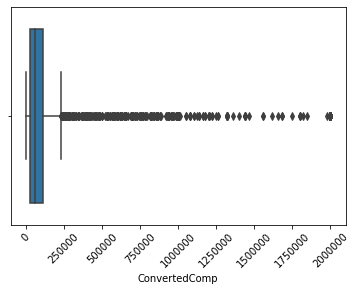

In [21]:
sns.boxplot(x=df['ConvertedComp'])
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

To remove the outliers I need to calculate the interquartile range:

In [55]:
data_input=df['ConvertedComp']
min_=data_input.min()
max_=data_input.max()
median=data_input.quantile(q=0.5)
iq1=data_input.quantile(q=0.25)
iq3=data_input.quantile(q=0.75)
iqr=iq3-iq1
upper_whisker = iq3+1.5*iqr
lower_whisker = iq1-1.5*iqr

print(f"The number summary are: \n min: {min_} \n max: {max_} \n median: {median} \n iq1: {iq1} \n iq3: {iq3} \
      \n iqr: {iqr} \n upper_whisker: {upper_whisker} \n lower_whisker: {lower_whisker}")


The number summary are: 
 min: 0.0 
 max: 2000000.0 
 median: 62807.0 
 iq1: 30000.0 
 iq3: 110000.0       
 iqr: 80000.0 
 upper_whisker: 230000.0 
 lower_whisker: -90000.0


Identify how many outliers are there in the ConvertedComp column.


In [56]:
df["ConvertedComp"].value_counts().sum() #tot value in the ConvertedComp column

6333

In [63]:
df_filtered_outside_upper = df[df["ConvertedComp"]> upper_whisker] 
df_filtered_outside_lower = df[df["ConvertedComp"] < lower_whisker]
df_filtered_outside=pd.concat([df_filtered_outside_upper, df_filtered_outside_lower], axis=0)
df_filtered_outside.value_counts().sum()

463

Create a new dataframe by removing the outliers from the ConvertedComp column.


In [65]:
df_filtered_inside = df[(df["ConvertedComp"]<= upper_whisker) & (df["ConvertedComp"] >= lower_whisker)]
df_filtered_inside.value_counts().sum()

5870

In [66]:
5870+463

6333

In [60]:
# What is the median ConvertedComp before removing outliers?
df['ConvertedComp'].median()

62807.0

In [61]:
# What is the median ConvertedComp after removing outliers?
df_filtered_inside['ConvertedComp'].median()

57714.0

In [62]:
# What is the mean ConvertedComp after removing outliers?
df_filtered_inside['ConvertedComp'].mean()

65509.859006471386

I will do it, namely find and remove the outliers, also for the age variable:

In [53]:
# your code goes here
data_input=df['Age']
min_=data_input.min()
max_=data_input.max()
median=data_input.quantile(q=0.5)
iq1=data_input.quantile(q=0.25)
iq3=data_input.quantile(q=0.75)
iqr=iq3-iq1
upper_whisker = iq3+1.5*iqr
lower_whisker = iq1-1.5*iqr

print(f"The number summary are: \n min: {min_} \n max: {max_} \n median: {median} \n iq1: {iq1} \n iq3: {iq3} \
      \n iqr: {iqr} \n upper_whisker: {upper_whisker} \n lower_whisker: {lower_whisker}")


The number summary are: 
 min: 17.0 
 max: 71.0 
 median: 29.0 
 iq1: 25.0 
 iq3: 34.0       
 iqr: 9.0 
 upper_whisker: 47.5 
 lower_whisker: 11.5


In [54]:
# Based on the boxplot of ‘Age’ how many outliers do you see below Q1
df_filtered_outside_lower = df[df["Age"] < lower_whisker]
df_filtered_outside_lower.value_counts().sum()

0

### Finding correlation


Find the correlation between Age and all other numerical columns.


In [52]:
df.corr()['Age']

Unnamed: 0                     -0.011681
Respondent                     -0.011891
CompTotal                      -0.000653
ConvertedComp                   0.094402
WorkWeekHrs                     0.022060
CodeRevHrs                     -0.023014
Age                             1.000000
multiplier                     -0.098245
NormalizedAnnualCompensation   -0.003910
Name: Age, dtype: float64